In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gene = pd.read_csv('HiSeqV2_percentile',sep='\t')
survival = pd.read_csv('survival_BRCA_survival.txt',sep='\t')
clinicalData = pd.read_csv('TCGA.BRCA.sampleMap_BRCA_clinicalMatrix', sep='\t')

In [3]:
geneTranspose = gene.set_index('sample')
geneTranspose = geneTranspose.transpose()
geneTranspose.reset_index(names='sampleID', inplace=True)

In [4]:
column_names = clinicalData.columns
print(column_names)

Index(['sampleID', 'AJCC_Stage_nature2012',
       'Age_at_Initial_Pathologic_Diagnosis_nature2012',
       'CN_Clusters_nature2012', 'Converted_Stage_nature2012',
       'Days_to_Date_of_Last_Contact_nature2012',
       'Days_to_date_of_Death_nature2012', 'ER_Status_nature2012',
       'Gender_nature2012', 'HER2_Final_Status_nature2012',
       ...
       '_GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene',
       '_GENOMIC_ID_TCGA_BRCA_miRNA_GA',
       '_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile',
       '_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene',
       '_GENOMIC_ID_TCGA_BRCA_gistic2thd',
       '_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene',
       '_GENOMIC_ID_TCGA_BRCA_G4502A_07_3',
       '_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2', '_GENOMIC_ID_TCGA_BRCA_gistic2',
       '_GENOMIC_ID_TCGA_BRCA_PDMarray'],
      dtype='object', length=194)


In [5]:
agenull_data = clinicalData[clinicalData['Age_at_Initial_Pathologic_Diagnosis_nature2012'].isnull()]
age = clinicalData[clinicalData['Age_at_Initial_Pathologic_Diagnosis_nature2012'].notnull()]

In [6]:
survival = survival.rename(columns= {'sample':'sampleID'})
survival = survival[survival['OS.time'] != 0].reset_index(drop=True)

In [7]:
common_sample_ids = set(age['sampleID']).intersection(survival['sampleID'], geneTranspose['sampleID'])

In [8]:
age = age[age['sampleID'].isin(common_sample_ids)].sort_values(by='sampleID').reset_index(drop=True)

survival = survival[survival['sampleID'].isin(common_sample_ids)].sort_values(by='sampleID').reset_index(drop=True)

geneTranspose = geneTranspose[geneTranspose['sampleID'].isin(common_sample_ids)].sort_values(by='sampleID').reset_index(drop=True)

In [9]:
sorted_indices = age.sort_values(by='Age_at_Initial_Pathologic_Diagnosis_nature2012').index

sorted_age = age.loc[sorted_indices].reset_index(drop=True)
sorted_survival = survival.loc[sorted_indices].reset_index(drop=True)
sorted_gene = geneTranspose.loc[sorted_indices].reset_index(drop=True)

print('AGE:',sorted_age.shape)
print('SURVIVAL:', sorted_survival.shape)
print('GENE:',sorted_gene.shape)


AGE: (918, 194)
SURVIVAL: (918, 11)
GENE: (918, 20531)


In [10]:
os_time = sorted_survival['OS.time'].dropna().values  # Dropping any NaNs if they exist

# Reshape into a matrix where each row has 27 elements
num_elements = 27
num_rows = len(os_time) // num_elements  # Number of complete rows with 30 elements each
data_matrix = os_time[:num_rows * num_elements].reshape(num_rows, num_elements)


data_matrix_months = data_matrix / 30.44
Y = data_matrix_months
print('Y',Y.shape)

Y (34, 27)


In [11]:
from IPython.display import display
ages = sorted_age['Age_at_Initial_Pathologic_Diagnosis_nature2012'].dropna().values
age_matrix = ages[:num_rows * num_elements].reshape(num_rows, num_elements)
average_age_per_row = np.mean(age_matrix, axis=1)
result_df = pd.DataFrame({
    'Average Age': average_age_per_row,
    'Survival Times (Months)': list(data_matrix_months)
})

# Display the resulting DataFrame
display(result_df)

,Average Age,Survival Times (Months)
0,31.148148,"[68.39684625492772, 94.15243101182654, 98.2588..."
1,36.370370,"[74.83574244415243, 23.291721419185283, 113.73..."
2,38.814815,"[18.889618922470433, 8.47568988173456, 4.40210..."
3,40.407407,"[70.17082785808147, 20.992115637319316, 19.185..."
4,42.037037,"[32.75295663600526, 10.085413929040735, 7.4572..."
5,44.074074,"[16.26149802890933, 16.26149802890933, 107.161..."
6,45.222222,"[0.328515111695138, 36.793692509855454, 70.302..."
7,46.518519,"[20.43363994743758, 63.3377135348226, 50.85413..."
8,47.740741,"[83.80420499342969, 17.279894875164256, 50.0, ..."
9,49.074074,"[48.42312746386334, 24.540078843626805, 129.99..."


In [12]:
aage = np.round(average_age_per_row).astype(int)

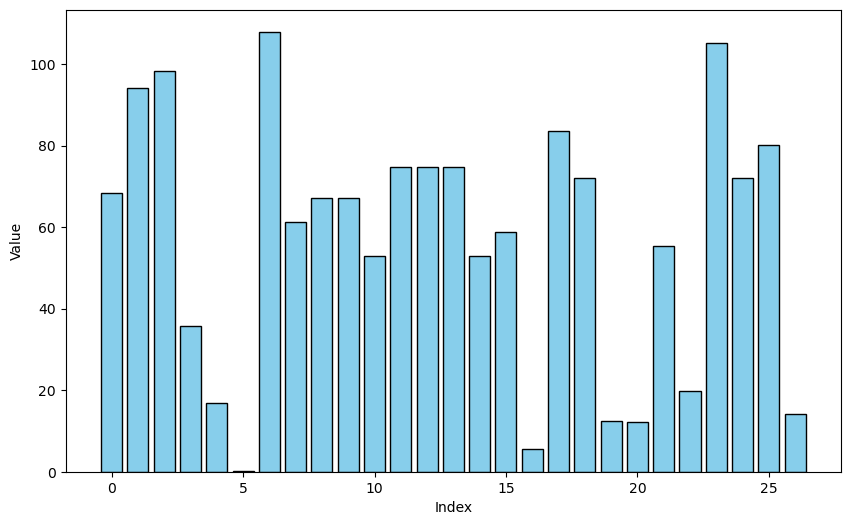

In [13]:
first_row = Y[0, :] if isinstance(Y, np.ndarray) else Y.iloc[0, :].values
plt.figure(figsize=(10, 6))
plt.bar(range(len(first_row)), first_row, color='skyblue', edgecolor='black')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

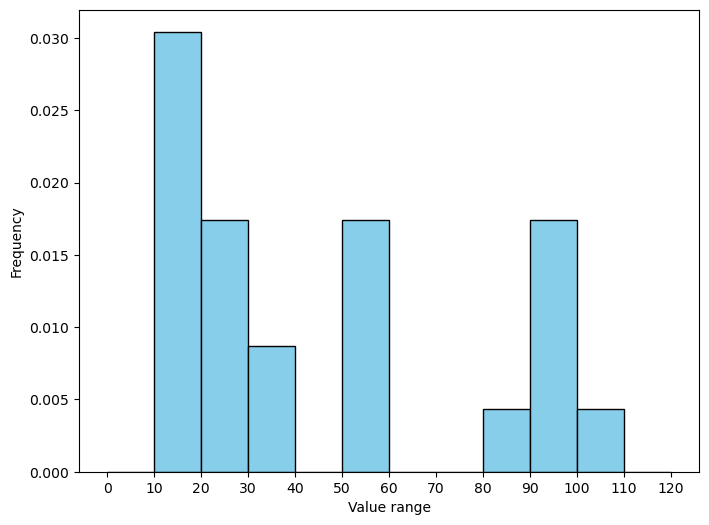

In [14]:
first_row = Y[10, :] if isinstance(Y, np.ndarray) else Y.iloc[0, :].values

bins = np.arange(0,130,10)
plt.figure(figsize=(8, 6))
plt.hist(first_row, bins=bins,density= True, color='skyblue', edgecolor='black')
plt.xlabel('Value range')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.show()

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
num_bins = len(bins)

num_rows = Y.shape[0]
all_density_values = np.zeros((num_rows, num_bins))


for i in range(num_rows):
    
    counts, _ = np.histogram(Y[i, :], bins=bins, density=False)
    
    
    all_density_values[i, :-1] = counts / len(Y[i, :])
    
    count_above_120 = np.sum(Y[i, :] > 120)
    all_density_values[i, -1] = count_above_120 / len(Y[i, :])
Y_density = all_density_values
#with support grids:[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 120]


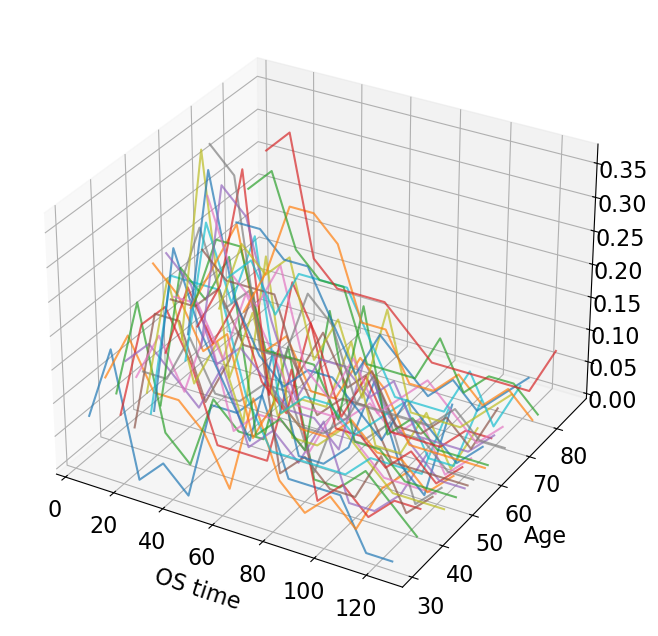

In [42]:
dsup = [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(aage)):
    ax.plot(dsup, [aage[i]] * len(dsup), Y_density[i, :], alpha=0.7)

# Set axis labels
ax.set_xlabel('OS time', fontsize=16,labelpad=10)
ax.set_ylabel('Age', fontsize=16,labelpad=10)
ax.set_zlabel('')
ax.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('survival1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [17]:
np.savetxt('Y_density.csv', Y_density, delimiter=',')

In [18]:
cdf_values = np.cumsum(Y_density,axis=1)
Y_cdf = cdf_values


In [19]:
Y = pd.read_csv('genequantiles.csv')
Y = Y.to_numpy()
qsup = np.linspace(0,1,26)

In [20]:
data_gene = sorted_gene.iloc[:, 1:]
gene_avg = data_gene.groupby(data_gene.index//num_elements).mean() 

In [21]:
gene_avg_cleaned = gene_avg.dropna(axis=1, how='all')
missing_rows = gene_avg_cleaned[gene_avg_cleaned.isnull().any(axis=1)]  
missing_indices = missing_rows.index.tolist()


print("Indices with missing values:", missing_indices)

Indices with missing values: []


In [22]:
gene_avg_cleaned = gene_avg_cleaned.loc[:, (gene_avg_cleaned != 0).any(axis=0)]

In [23]:
gene_avg_cleaned.to_csv('gene_avg.csv', index=False)
np.savetxt('Y_data.csv', Y, delimiter=',')


In [ ]:
index = pd.read_csv('geneindex.csv')
indices = index.iloc[:, 0].values
gene_filter = gene_avg_cleaned.iloc[:,indices]
X = gene_filter
X = X.to_numpy()

In [25]:
from lib_fun import *
from sklearn.covariance import GraphicalLassoCV

from FOPG import *
from MAVE1 import *
from numpy.linalg import inv

In [26]:
mean= np.mean(X,axis = 0)
std = np.std(X,axis = 0, ddof =1)

X = (X-mean)/std
neigh = False

d_0 = 3

In [27]:
n,p = X.shape
#GWIRE
Nb = []
    
if not neigh:
    # Neighborhood is unknown
    graphical_lasso_model = GraphicalLassoCV() 
    graphical_lasso_model.fit(X)
    omega = graphical_lasso_model.precision_
        
for j in range(p):
    Ni = np.nonzero(omega[j, :])[0].tolist()
    Nb.append(Ni)

metric = "Wasserstein"

#d_est = gwire_d(X, Y, metric, Nb)
beta_gwire, _ = gwire_cv(X, Y, Nb, metric, d_0, fold=5)

c:\Users\ohhit\miniconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:160: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
c:\Users\ohhit\miniconda3\lib\site-packages\sklearn\covariance\_graph_lasso.py:161: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
c:\Users\ohhit\miniconda3\lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [28]:
Xb = X@beta_gwire
#df = pd.DataFrame(Xb)
#df.to_csv('bikeGx.csv', index=False)
X2 = np.hstack((Xb, np.ones((n, 1))))
n,p = X2.shape
y_pred = np.dot(X2, np.linalg.inv(np.dot(X2.T, X2)).dot(X2.T).dot(Y))

SS_res = np.sum((Y - y_pred)**2)
SS_tot = np.sum((Y - np.mean(Y,axis=0))**2)
R_squared1 = 1 - (SS_res / SS_tot)

# Calculate adjusted R-squared
R_squared_adj = 1 - ((1 - R_squared1) * (n - 1) / (n - p - 1))

# Display the results
print(f'R-squared: {R_squared1}')
print(f'Adjusted R-squared: {R_squared_adj}')


#poly fit

Xpoly = np.hstack([
    np.ones((n, 1)),                # Column of ones
    Xb,                              # Original features
    Xb**2,                            # Squares of the features
    Xb[:, [0]] * Xb[:, [1]],           # Interaction terms
    Xb[:, [0]] * Xb[:, [2]],  
    Xb[:, [1]] * Xb[:, [2]]
     
])


Xpoly_inv = inv(Xpoly.T @ Xpoly)
y_pred = Xpoly @ Xpoly_inv @ Xpoly.T @ Y

# Calculate R-squared
SS_res = np.sum((Y - y_pred)**2)
SS_tot = np.sum((Y - np.mean(Y))**2)
R_squared1 = 1 - (SS_res / SS_tot)

print(f'Poly_R-squared: {R_squared1}')

R-squared: 0.6906183657668561
Adjusted R-squared: 0.647945036907112
Poly_R-squared: 0.9996388274089041


In [29]:
np.savetxt('survivalX_G.csv', Xb, delimiter=',')

In [30]:
from itertools import combinations
def gram_matrix2(x, lambda_, kernel='Gaussian'):
    """
    Compute the kernel Gram matrix.
    
    Parameters:
        x (numpy.ndarray): A n by m matrix for distributional objects.
        lambda_ (float): Tuning parameter in the reproducing kernel.
        kernel (str): Type of kernel - 'Gaussian' or 'Laplacian'. Default is 'Gaussian'.
    
    Returns:
        numpy.ndarray: n by n kernel Gram matrix.
    """
    # Convert input to matrix if needed
    x = np.asarray(x, dtype=np.float64)
    n = x.shape[0]
    
    # Compute distance matrix for distributional data
    k = dist(x)
    complexity = 1
    
    # Compute normalization factor
    n_pairs = n * (n - 1) / 2
    
    # Compute kernel Gram matrix
    if kernel == 'Gaussian':
        sigma2 = np.sum(k**2) / n_pairs
        gamma = complexity / sigma2 *lambda_
        K = np.exp(-gamma * k**2)
    elif kernel == 'Laplacian':
        sigma = np.sum(k) / n_pairs
        gamma = complexity / sigma
        K = np.exp(-gamma * k)
    else:
        raise ValueError('Unknown kernel')
    
    return K





def wasserstein1d(a, b, p=2):
    """
    Compute the Wasserstein distance between two 1D distributions.
    
    Parameters:
        a (numpy.ndarray): 1D array of the first distribution.
        b (numpy.ndarray): 1D array of the second distribution.
        p (int): Power parameter for the Wasserstein distance. Default is 2.
    
    Returns:
        float: Wasserstein distance between a and b.
    """
    if len(a) != len(b):
        raise ValueError('Vectors must have the same length.')
    
    # Sort the arrays
    a_sorted = np.asarray(a)
    b_sorted = np.asarray(b)
    
    # Compute the Wasserstein distance
    distance = np.mean(np.abs(b_sorted - a_sorted)**p)**(1/p)
    
    return distance

def dist(x):
    """
    Compute the Wasserstein distance matrix for a given matrix x.
    
    Parameters:
        x (numpy.ndarray): A n by m matrix where each row is an iid observation from a distribution.
    
    Returns:
        numpy.ndarray: Wasserstein distance matrix.
    """
    n = x.shape[0]
    dmatrix = np.zeros((n, n))
    
    # Generate all unique pairs of indices
    indices = list(combinations(range(n), 2))
    
    for i, k in indices:
        dmatrix[i, k] = wasserstein1d(x[i, :], x[k, :])
    
    # Make the matrix symmetric
    dmatrix = dmatrix + dmatrix.T
    
    return dmatrix

In [31]:
#FOPG
ygram = gram_matrix2(cdf_values,1)
beta_fopg =FOPG(X,ygram,d_0)

In [32]:
Xb = X@beta_fopg
#df = pd.DataFrame(Xb)
#df.to_csv('bikeGx.csv', index=False)
X2 = np.hstack((Xb, np.ones((n, 1))))
n,p = X2.shape
y_pred = np.dot(X2, np.linalg.inv(np.dot(X2.T, X2)).dot(X2.T).dot(Y))

SS_res = np.sum((Y - y_pred)**2)
SS_tot = np.sum((Y - np.mean(Y,axis=0))**2)
R_squared1 = 1 - (SS_res / SS_tot)

# Calculate adjusted R-squared
R_squared_adj = 1 - ((1 - R_squared1) * (n - 1) / (n - p - 1))

# Display the results
print(f'R-squared: {R_squared1}')
print(f'Adjusted R-squared: {R_squared_adj}')


#poly fit

Xpoly = np.hstack([
    np.ones((n, 1)),                # Column of ones
    Xb,                              # Original features
    Xb**2,                            # Squares of the features
    Xb[:, [0]] * Xb[:, [1]],           # Interaction terms
    Xb[:, [0]] * Xb[:, [2]],  
    Xb[:, [1]] * Xb[:, [2]]
     
])


Xpoly_inv = inv(Xpoly.T @ Xpoly)
y_pred = Xpoly @ Xpoly_inv @ Xpoly.T @ Y

# Calculate R-squared
SS_res = np.sum((Y - y_pred)**2)
SS_tot = np.sum((Y - np.mean(Y))**2)
R_squared1 = 1 - (SS_res / SS_tot)

print(f'Poly_R-squared: {R_squared1}')

R-squared: 0.6883979322659088
Adjusted R-squared: 0.645418336716379
Poly_R-squared: 0.9996460118727879


In [33]:
np.savetxt('survivalX_F.csv', Xb, delimiter=',')

In [34]:
#Fd_SDR
ygram2 = gram_matrix2(cdf_values,1)
ygram3 = np.real(sqrtm(ygram2))
init = beta_gwire
beta_dcov, _,_ = MAVE1(X.T,ygram3,init)


In [35]:
Xb = X@beta_dcov
#df = pd.DataFrame(Xb)
#df.to_csv('bikeGx.csv', index=False)
X2 = np.hstack((Xb, np.ones((n, 1))))
n,p = X2.shape
y_pred = np.dot(X2, np.linalg.inv(np.dot(X2.T, X2)).dot(X2.T).dot(Y))

SS_res = np.sum((Y - y_pred)**2)
SS_tot = np.sum((Y - np.mean(Y,axis=0))**2)
R_squared1 = 1 - (SS_res / SS_tot)

# Calculate adjusted R-squared
R_squared_adj = 1 - ((1 - R_squared1) * (n - 1) / (n - p - 1))

# Display the results
print(f'R-squared: {R_squared1}')
print(f'Adjusted R-squared: {R_squared_adj}')


#poly fit

Xpoly = np.hstack([
    np.ones((n, 1)),                # Column of ones
    Xb,                              # Original features
    Xb**2,                            # Squares of the features
    Xb[:, [0]] * Xb[:, [1]],           # Interaction terms
    Xb[:, [0]] * Xb[:, [2]],  
    Xb[:, [1]] * Xb[:, [2]]
     
])


Xpoly_inv = inv(Xpoly.T @ Xpoly)
y_pred = Xpoly @ Xpoly_inv @ Xpoly.T @ Y

# Calculate R-squared
SS_res = np.sum((Y - y_pred)**2)
SS_tot = np.sum((Y - np.mean(Y))**2)
R_squared1 = 1 - (SS_res / SS_tot)

print(f'Poly_R-squared: {R_squared1}')

R-squared: 0.7019743910961438
Adjusted R-squared: 0.6608674105576808
Poly_R-squared: 0.9997507347177899


In [36]:
np.savetxt('survivalX_D.csv', Xb, delimiter=',')

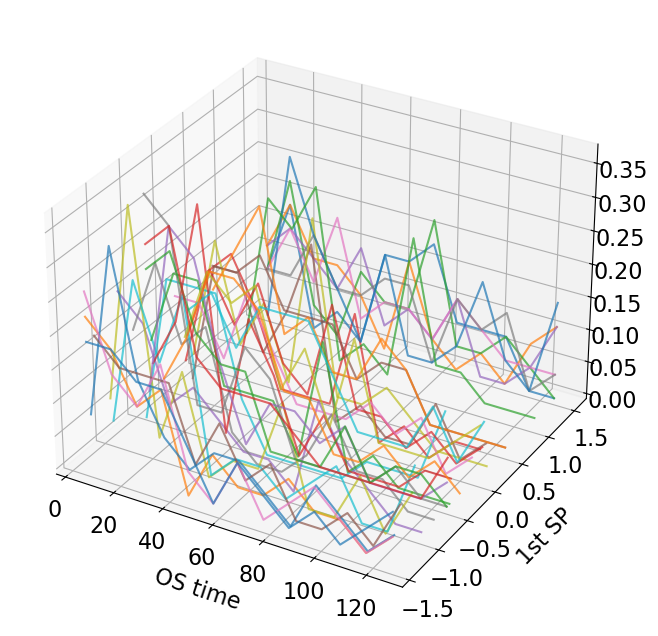

In [41]:
newx1 = X@beta_dcov[:,0]
dsup = [5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 95.0, 105.0, 115.0, 125]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(newx1)):
    ax.plot( dsup,[newx1[i]] * len(dsup), Y_density[i, :], alpha=0.7)

# Set axis labels
ax.set_ylabel('1st SP', fontsize=16,labelpad=10)
ax.set_xlabel('OS time', fontsize=16,labelpad=10)
ax.set_zlabel('')
ax.tick_params(axis='both', which='major', labelsize=16)


plt.savefig('survival2.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()